### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error

### Extracting Data

In [ ]:
dataset = pd.read_csv("/content/GPI data.csv")

### Converting data into desired arrays

In [ ]:
countryName = dataset.iloc[:,0].values
y = dataset.iloc[:,4].values
x1 = dataset.iloc[:,1].values
x2 = dataset.iloc[:,2].values
x3 = dataset.iloc[:,3].values
x1 = x1.reshape(x1.shape[0],1)
x2 = x2.reshape(x2.shape[0],1)
x3 = x3.reshape(x3.shape[0],1)
x = np.append(x1,x2,axis=1)
x = np.append(x,x3,axis=1)

### Splitting data into training data and testing data

In [ ]:
x_train, x_test, y_train, y_test, countryName_train, countryName_test = train_test_split(x,y,countryName,test_size=0.2,random_state=1)

### Training model using Linear Regression

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Training model using Decision Tree Regressor

In [ ]:
model2 = DecisionTreeRegressor(random_state = 0)
model2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

### Training model using Random Forest Regressor

In [ ]:
model3 = RandomForestRegressor(n_estimators = 20, random_state = 0)
model3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

### Predicting  score for test data

In [ ]:
y_predicted_linear = model.predict(x_test)
y_predicted_decisionTree = model2.predict(x_test)
y_predicted_randomForest = model3.predict(x_test)

### Taking out r2_score of the predicted data

In [ ]:
r2_score_linear = r2_score(y_test, y_predicted_linear)
r2_score_decisionTree = r2_score(y_test, y_predicted_decisionTree)
r2_score_randomForest = r2_score(y_test, y_predicted_randomForest)
print("r2 score of Linear Regression model : ", r2_score_linear)
print("r2 score of Decision Tree Regression model : ", r2_score_decisionTree)
print("r2 score of Random Forest Regression model : ", r2_score_randomForest)

r2 score of Linear Regression model :  0.9914942867713249
r2 score of Decision Tree Regression model :  0.9473528127034585
r2 score of Random Forest Regression model :  0.9724067211560283


### Taking out mean squared error of the predicted data

In [ ]:
mean_squared_error_linear = mean_squared_error(y_test, y_predicted_linear)
mean_squared_error_decisionTree = mean_squared_error(y_test, y_predicted_decisionTree)
mean_squared_error_randomForest = mean_squared_error(y_test, y_predicted_randomForest)
print("Mean squared error of Linear Regression model : ", mean_squared_error_linear)
print("Mean squared error of Decision Tree Regression model : ", mean_squared_error_decisionTree)
print("Mean squared error of Random Forest Regression model : ", mean_squared_error_randomForest)

Mean squared error of Linear Regression model :  0.0019502817032950829
Mean squared error of Decision Tree Regression model :  0.012071515151515163
Mean squared error of Random Forest Regression model :  0.0063268846969697055


### Plotting overall GDI scores of all countries

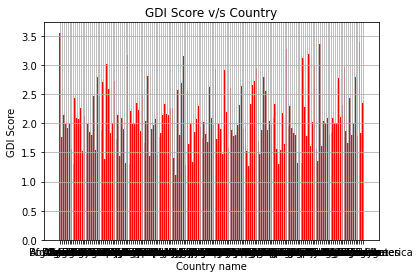

In [ ]:
country = dataset.iloc[:,0].values
plt.bar(country,y, color='red')
plt.title("GDI Score v/s Country")
plt.xlabel("Country name")
plt.ylabel("GDI Score")
plt.grid()
plt.show()

### Plotting predicted data using different regression models

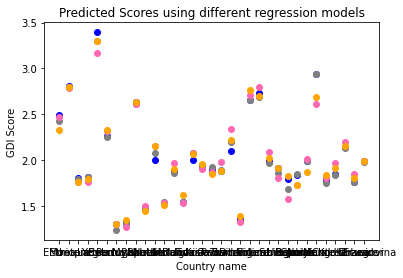

In [ ]:
plt.scatter(countryName_test, y_test, color = "blue")
plt.scatter(countryName_test, y_predicted_linear, color = "gray")
plt.scatter(countryName_test, y_predicted_decisionTree, color = "hotpink")
plt.scatter(countryName_test, y_predicted_randomForest, color = "orange")

plt.xlabel("Country name")
plt.ylabel("GDI Score")
plt.title("Predicted Scores using different regression models")
plt.show()

### Plotting r2 score and mean squared error of different regression models

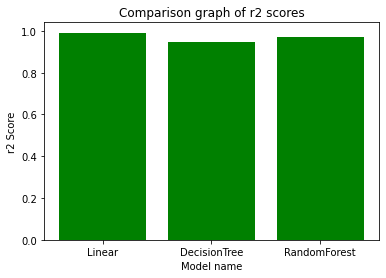

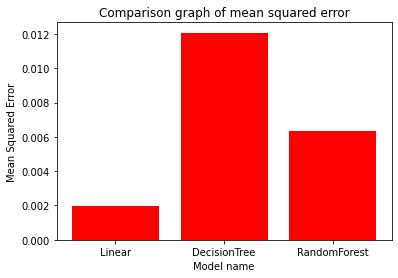

In [ ]:
models = np.array(["Linear", "DecisionTree", "RandomForest"])
r2Score = np.array([r2_score_linear, r2_score_decisionTree, r2_score_randomForest])
plt.bar(models,r2Score, color='green')
plt.xlabel("Model name")
plt.ylabel("r2 Score")
plt.title("Comparison graph of r2 scores")
plt.show()
meanSquaredError = np.array([mean_squared_error_linear, mean_squared_error_decisionTree, mean_squared_error_randomForest])
plt.bar(models,meanSquaredError, color='red')
plt.xlabel("Model name")
plt.ylabel("Mean Squared Error")
plt.title("Comparison graph of mean squared error")
plt.show()